In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, LeakyReLU, Activation
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split

from keras.optimizers import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((35000, 32, 32, 3), (15000, 32, 32, 3), (35000, 1), (15000, 1))

In [4]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
print(y_train.shape, y_val.shape)

(35000, 10) (15000, 10)


In [5]:
# Normalize the data. Before we need to convert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [6]:
print(x_train.shape)
print(y_train.shape)

(35000, 32, 32, 3)
(35000, 10)


In [7]:
from tensorflow.keras.regularizers import l2


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0

In [8]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

datagen.fit(x_train)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128, subset='training'),
    epochs=50,
    validation_data=datagen.flow(x_train, y_train, batch_size=128, subset='validation'),
    callbacks=[early_stopping]
)

Epoch 1/50
219/219 [==============================] - 38s 105ms/step - loss: 3.0747 - accuracy: 0.3469 - val_loss: 3.7612 - val_accuracy: 0.1260
Epoch 2/50
219/219 [==============================] - 22s 102ms/step - loss: 2.4284 - accuracy: 0.4752 - val_loss: 3.2031 - val_accuracy: 0.2471
Epoch 3/50
219/219 [==============================] - 21s 97ms/step - loss: 2.0205 - accuracy: 0.5354 - val_loss: 2.3096 - val_accuracy: 0.4250
Epoch 4/50
219/219 [==============================] - 21s 97ms/step - loss: 1.7482 - accuracy: 0.5756 - val_loss: 1.9253 - val_accuracy: 0.4983
Epoch 5/50
219/219 [==============================] - 21s 96ms/step - loss: 1.5937 - accuracy: 0.5962 - val_loss: 2.2431 - val_accuracy: 0.4111
Epoch 6/50
219/219 [==============================] - 21s 96ms/step - loss: 1.4923 - accuracy: 0.6146 - val_loss: 1.7520 - val_accuracy: 0.5044
Epoch 7/50
219/219 [==============================] - 20s 92ms/step - loss: 1.4285 - accuracy: 0.6283 - val_loss: 1.6362 - val_accurac

In [10]:
test_eval = model.evaluate(x_test, y_test, verbose=2)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 - 3s - loss: 1.2385 - accuracy: 0.7280 - 3s/epoch - 9ms/step
Test loss: 1.2384769916534424
Test accuracy: 0.7279999852180481


In [11]:
val_eval = model.evaluate(x_val, y_val, verbose=2)

print('Val loss:', val_eval[0])
print('Val accuracy:', val_eval[1])

469/469 - 2s - loss: 219.1545 - accuracy: 0.2029 - 2s/epoch - 5ms/step
Val loss: 219.1544647216797
Val accuracy: 0.20293332636356354


In [12]:
train_eval = model.evaluate(x_train, y_train, verbose=2)

print('Train loss:', train_eval[0])
print('Train accuracy:', train_eval[1])

1094/1094 - 4s - loss: 1.1656 - accuracy: 0.7455 - 4s/epoch - 4ms/step
Train loss: 1.165619969367981
Train accuracy: 0.7454571723937988


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


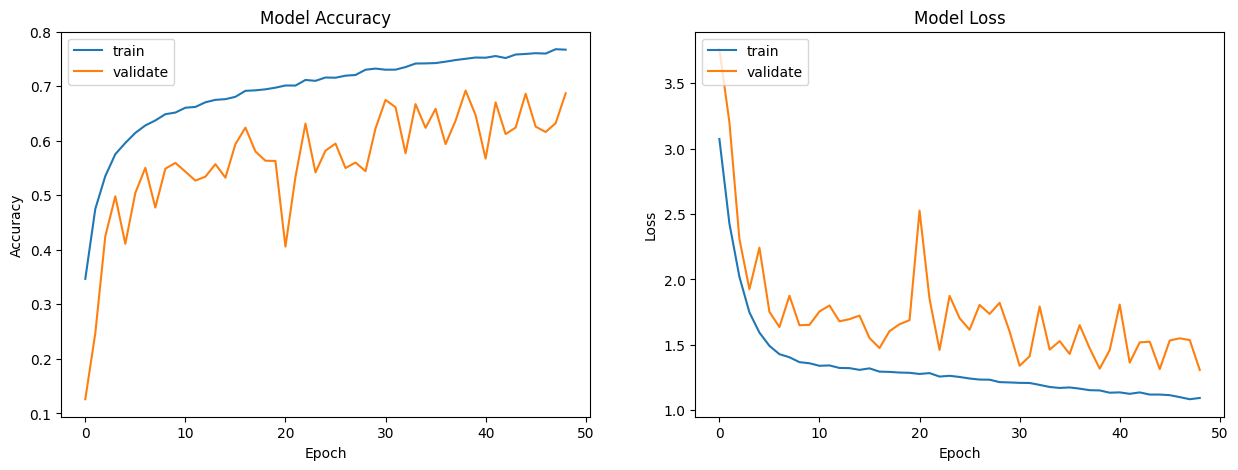

In [13]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)
predicted_classes.shape, y_test.shape

313/313 [==============================] - 1s 3ms/step


((10000,), (10000, 10))